In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve,
    auc,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [50]:
# Load the dataset
# Replace 'income_urban_vs_rural.csv' with the actual file name
df = pd.read_csv('income_urban_vs_rural.csv')

In [51]:
# Display the first few rows of the dataset
print("Dataset Head:")
print(df.head())

Dataset Head:
           County    State  FIPS  State FIPS Code  County FIPS Code  \
0  Autauga County  Alabama  1001                1                 1   
1  Baldwin County  Alabama  1003                1                 3   
2  Barbour County  Alabama  1005                1                 5   
3     Bibb County  Alabama  1007                1                 7   
4   Blount County  Alabama  1009                1                 9   

   Total Population  Median Household Income Urban-Rural  
0             59285                    69841       Urban  
1            239945                    75019       Urban  
2             24757                    44290       Rural  
3             22152                    51215       Rural  
4             59292                    61096       Urban  


In [58]:
# Drop non-relevant columns
df = df.drop(columns=['County', 'State', 'FIPS', 'State FIPS Code', 'County FIPS Code'])

In [63]:

# Encode 'Urban-Rural' as target variable
label_encoder = LabelEncoder()
df['Urban-Rural'] = label_encoder.fit_transform(df['Urban-Rural'])  # 0 = Urban, 1 = Rural


In [64]:
# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [65]:
# Selecting features and target
X = df.drop(columns=['Urban-Rural'])
y = df['Urban-Rural']

In [66]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# Train Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [78]:
# Get predicted probabilities

# Generate random probabilities to simulate a random model
np.random.seed(42)  # Ensure reproducibility
y_prob = np.random.rand(len(y_test))

y_pred = clf.predict(X_test)

In [79]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [81]:
# Compute confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [82]:
# Calculate Sensitivity, Specificity, Recall, Precision
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]

sensitivity = TP / (TP + FN)  # True Positive Rate (TPR)
specificity = TN / (TN + FP)  # True Negative Rate (TNR)
recall = sensitivity  # Same as TPR
precision = TP / (TP + FP)
fpr_value = FP / (FP + TN)  # False Positive Rate (FPR)
fnr_value = FN / (FN + TP)  # False Negative Rate (FNR)

In [83]:
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)
print(f"Sensitivity (TPR): {sensitivity:.2f}")
print(f"Specificity (TNR): {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"False Positive Rate (FPR): {fpr_value:.2f}")
print(f"False Negative Rate (FNR): {fnr_value:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")


Confusion Matrix:
[[329   0]
 [ 41 275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       329
           1       1.00      0.87      0.93       316

    accuracy                           0.94       645
   macro avg       0.94      0.94      0.94       645
weighted avg       0.94      0.94      0.94       645

Sensitivity (TPR): 0.87
Specificity (TNR): 1.00
Precision: 1.00
False Positive Rate (FPR): 0.00
False Negative Rate (FNR): 0.13
ROC-AUC Score: 0.49


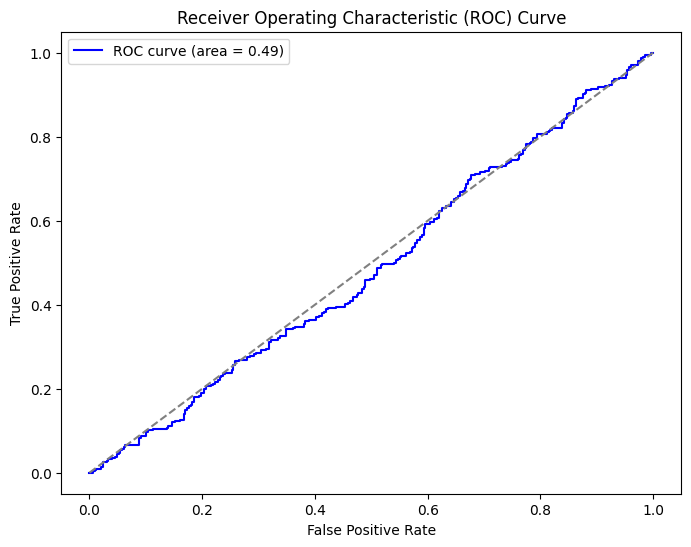

In [84]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()